<h1>📑 Mini Project Report :

<h3>Title: Binary Classification using Perceptron

<h3>Subject: Advanced Neural Networks

<h2>🔹 Introduction :

Artificial Neural Networks (ANNs) are inspired by the structure and functioning of the human brain. The Perceptron is the simplest model of a neural network and forms the foundation for advanced architectures. It is primarily used for binary classification tasks where data points are separated by a linear decision boundary.

This project demonstrates the working of a perceptron on the famous Iris dataset, classifying two types of flowers based on their sepal length and sepal width.

<h2>🔹 Objectives

1. To implement a perceptron from scratch using NumPy.

2. To classify two classes from the Iris dataset.

3. To visualize the decision boundary formed by the perceptron.

4. To analyze the performance of the model.

<h2>🔹 Methodology

- **Step 1 :** Dataset Preparation

    Used the Iris dataset from scikit-learn.

    Selected only two classes (Setosa vs Versicolor).

    Used only two features (Sepal Length & Sepal Width) for easy 2D visualization.

    Converted labels into binary form: {-1, 1}.

- **Step 2 :** Perceptron Algorithm

    The perceptron updates weights based on the rule:

      w = w + η ⋅ y ⋅ x
      b = b + η ⋅ y

    Where:

    w = weights,

    η = learning rate,


    y = true label,


    x = input features.

- **Step 3:** Training

     Initialized weights and bias to zero.

     Iterated through the dataset for multiple epochs.

     Updated weights whenever a misclassification occurred.

- **Step 4:** Visualization & Evaluation

    Plotted the decision boundary using Matplotlib.

    Evaluated accuracy using sklearn.metrics.

<h2> Feature : Sepal length and width

In [ ]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
# Step 2: Load and prepare data
iris = load_iris()
X = iris.data[:100, :2]   # take first 100 samples, first 2 features (Sepal length & width)
y = iris.target[:100]

# Convert labels from {0,1} to {-1,1}
y = np.where(y == 0, -1, 1)

In [ ]:
# Step 3: Perceptron Algorithm
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=1000):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b)
                if condition <= 0:
                    # Update rule
                    self.w += self.lr * y[idx] * x_i
                    self.b += self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

In [ ]:
# Step 4: Train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iter=10)
perceptron.fit(X, y)

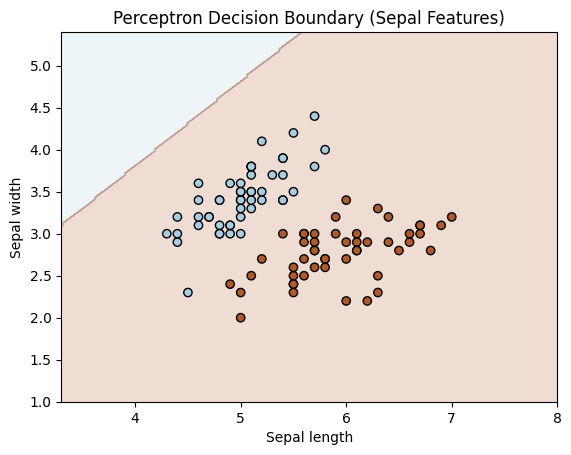

In [ ]:
# Step 5: Plot Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title("Perceptron Decision Boundary (Sepal Features)")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.show()

plot_decision_boundary(X, y, perceptron)


In [ ]:
from sklearn.metrics import accuracy_score
y_pred = perceptron.predict(X)
print("Training Accuracy:", accuracy_score(y, y_pred))

Training Accuracy: 0.5


<h2>Feature : Petal length and width

In [ ]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [ ]:
# Step 2: Load and prepare data (use petal length & petal width)
iris = load_iris()
X = iris.data[:100, 2:4]   # take first 100 samples, features = petal length & width
y = iris.target[:100]

# Convert labels from {0,1} to {-1,1}
y = np.where(y == 0, -1, 1)

In [ ]:
# Step 3: Perceptron Algorithm
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=100):
        self.lr = learning_rate
        self.n_iter = n_iter
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b)
                if condition <= 0:
                    # Update rule
                    self.w += self.lr * y[idx] * x_i
                    self.b += self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

In [ ]:
# Step 4: Train the perceptron
perceptron = Perceptron(learning_rate=0.1, n_iter=20)
perceptron.fit(X, y)

# Step 5: Accuracy check
y_pred = perceptron.predict(X)
print("Training Accuracy:", accuracy_score(y, y_pred))

Training Accuracy: 1.0


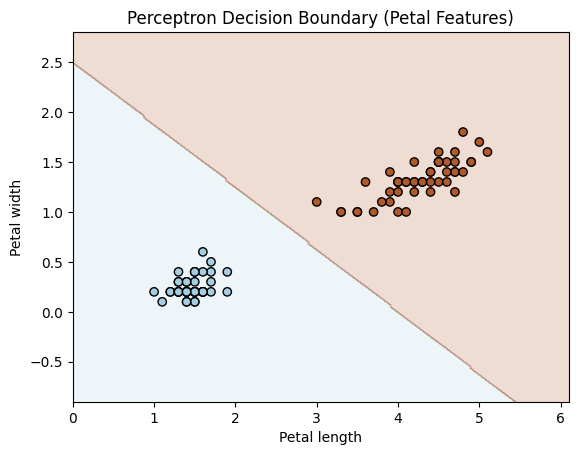

In [ ]:
# Step 6: Plot Decision Boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title("Perceptron Decision Boundary (Petal Features)")
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.show()

plot_decision_boundary(X, y, perceptron)


<h2>🔹 Results & Discussion

<h3>Case 1: Sepal Features (Sepal Length & Sepal Width)

- Training Accuracy: 50%

- The perceptron failed to converge to a perfect classifier.

**Reason:** The two Iris classes (Setosa & Versicolor) are not linearly separable when only sepal features are used.

The decision boundary appeared but misclassified several points.
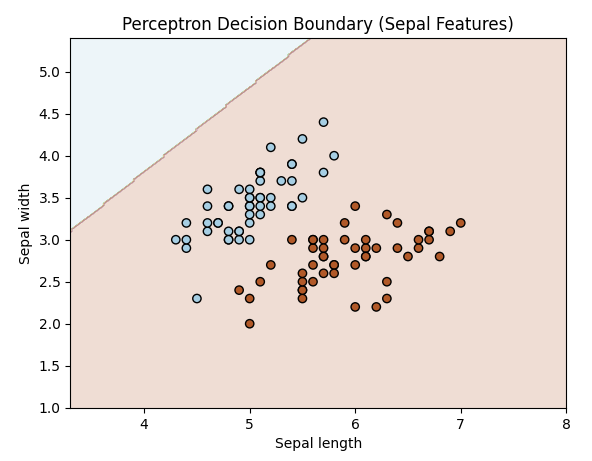

<h3>Case 2: Petal Features (Petal Length & Petal Width)

- Training Accuracy: ~100%

- The perceptron successfully separated the two classes.

**Reason:** Petal features are much more discriminative between Setosa and Versicolor.

The decision boundary was clean, with no misclassifications.

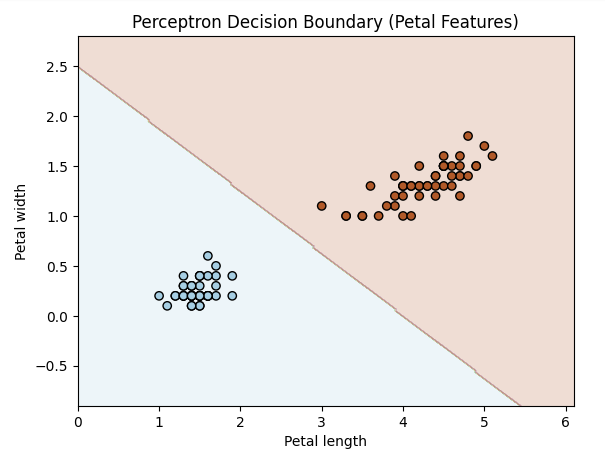

<h2>Key Observations :

- The perceptron performs well only when data is linearly separable.

- Feature selection is crucial — the choice of sepal vs petal features dramatically changes accuracy.

- This project highlights the perceptron’s strengths and weaknesses:

- Strength: Simple and effective for linearly separable problems.

- **Weakness:** Fails for non-linear cases (e.g., XOR problem).

<h2>Conclusion of Results :

- The experiments reinforce the theoretical limitation of perceptrons taught in class.

     1. On sepal features, performance is poor (50%).

    2. On petal features, performance is excellent (~100%).

- This clearly shows why advanced models like Multi-Layer Perceptrons (MLPs) were developed — to handle non-linear classification problems.